In [16]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import zipfile
import random

import shutil
from shutil import copyfile

from PIL import Image, ImageOps
from tqdm import tqdm

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# cek total folder dan class pada folder dataset nya
path = '/content/drive/MyDrive/dataset wajah' # ganti dengan path yg sesuai

entries = os.listdir(path)

folders = [entry for entry in entries if os.path.isdir(os.path.join(path, entry))]

print(f"Number of folders in '{path}': {len(folders)}")

print("Folder names:")
for folder in folders:
    print(folder)

Number of folders in '/content/drive/MyDrive/dataset wajah': 20
Folder names:
Sina Widianti
Vikken Aghenta Pradana
Muhammad Rafi Athallah
Tona Lestari
Wulan Restu Utami
Rafika Ayu
Zahrany Mega Lestari
Sella
Risky Firdaus
Violin Annisa Ramadhani
Laras Anggi Wijayanti
Muhammad Kannu Santara
Emilia Fransiska
Azzahra Karindiva
Dody Ardiansyah
Ilham Saleh
Dila Puspitasari
Marsellina
Aisyah Wulan Dari
Arya Thomas


In [8]:
# cek urutan class pada dataset
class_names = sorted(os.listdir("/content/drive/MyDrive/Dataset-Wajah-Train-Test/training")) # digunakan agar hasil prediksi sesuai dengan urutan class training
print(class_names)

['Aisyah Wulan Dari', 'Arya Thomas', 'Azzahra Karindiva', 'Dila Puspitasari', 'Dody Ardiansyah', 'Emilia Fransiska', 'Ilham Saleh', 'Laras Anggi Wijayanti', 'Marsellina', 'Muhammad Kannu Santara', 'Muhammad Rafi Athallah', 'Rafika Ayu', 'Risky Firdaus', 'Sella', 'Sina Widianti', 'Tona Lestari', 'Vikken Aghenta Pradana', 'Violin Annisa Ramadhani', 'Wulan Restu Utami', 'Zahrany Mega Lestari']


In [9]:
# cek total img pada masing" folder
for folder in folders:
    folder_path = os.path.join(path, folder)
    num_images = len(os.listdir(folder_path))
    print(f"{folder}: {num_images} images")

Sina Widianti: 24 images
Vikken Aghenta Pradana: 7 images
Muhammad Rafi Athallah: 11 images
Tona Lestari: 26 images
Wulan Restu Utami: 45 images
Rafika Ayu: 26 images
Zahrany Mega Lestari: 36 images
Sella: 37 images
Risky Firdaus: 59 images
Violin Annisa Ramadhani: 32 images
Laras Anggi Wijayanti: 17 images
Muhammad Kannu Santara: 40 images
Emilia Fransiska: 40 images
Azzahra Karindiva: 17 images
Dody Ardiansyah: 35 images
Ilham Saleh: 4 images
Dila Puspitasari: 56 images
Marsellina: 4 images
Aisyah Wulan Dari: 4 images
Arya Thomas: 11 images



Arya Thomas - total 11 images. Showing first 3:


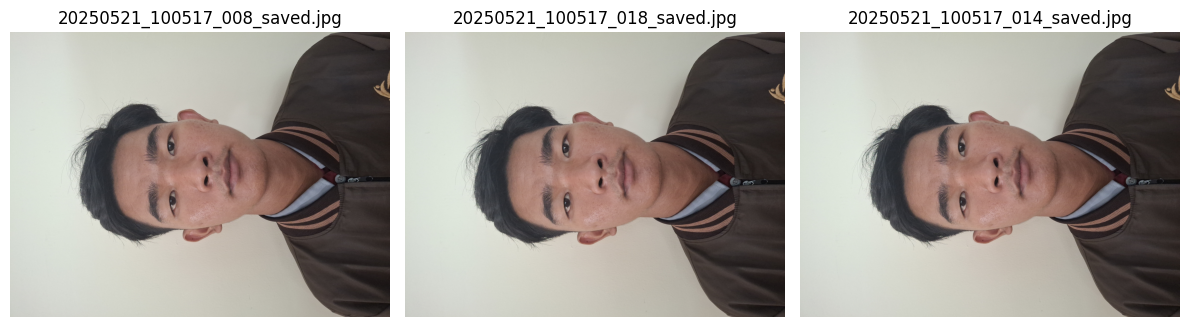


Aisyah Wulan Dari - total 4 images. Showing first 3:


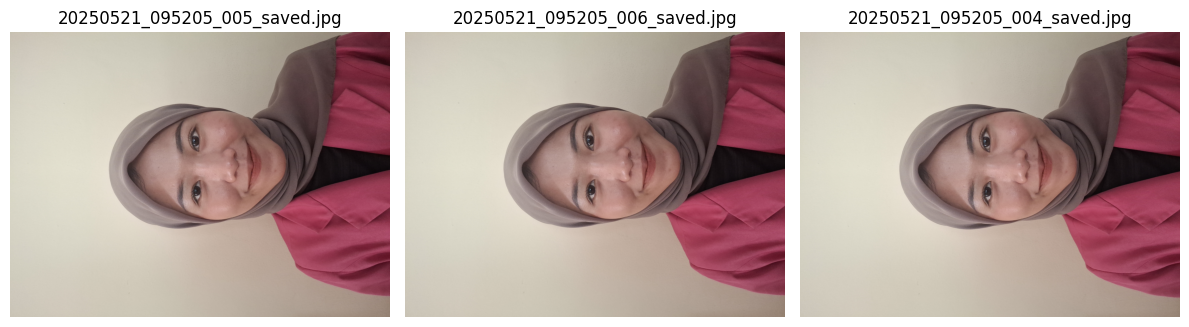

In [15]:
# menampilkan beberapa sample foto
folders = ["Arya Thomas", "Aisyah Wulan Dari"]  # sample folder untuk visualisasi
path = "/content/drive/MyDrive/dataset wajah"  # path dataset

for folder in folders:
    folder_path = os.path.join(path, folder)
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    # mampilkan 3 gambar pertama dari folder
    print(f"\n{folder} - total {len(image_files)} images. Showing first 3:")

    plt.figure(figsize=(12, 4))
    for i, img_name in enumerate(image_files[:3]):
        img_path = os.path.join(folder_path, img_name)
        img = Image.open(img_path)

        plt.subplot(1, 3, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(img_name)

    plt.tight_layout()
    plt.show()

dari hasii saat menampilkan beberapa sample tersebut, diketahui bahwa hasil nya adalah foto tersebut miring tidak semestinya itu karena hasil foto tersebut ( terutama hasil kamera hp ) menyimpan orientasi di metadata EXIF, bukan benar-benar memutar pikselnya, jadi next saya akan baca EXIF dan rotasi manual pakai kode di bwh ini

In [17]:
# fungsi untuk memperbaiki rotasi berdasarkan EXIF
def fix_exif_rotation_and_save(input_path, output_path):
    with Image.open(input_path) as img:
        img_fixed = ImageOps.exif_transpose(img)  # Perbaiki rotasi
        img_fixed.save(output_path)

src_path = "/content/drive/MyDrive/dataset wajah" # path asal
dst_path = "/content/drive/MyDrive/dataset wajah_fixed" # path tujuan

os.makedirs(dst_path, exist_ok=True)

# iterasi tiap folder dan file
for folder_name in os.listdir(src_path):
    src_folder = os.path.join(src_path, folder_name)
    dst_folder = os.path.join(dst_path, folder_name)

    if os.path.isdir(src_folder):
        os.makedirs(dst_folder, exist_ok=True)

        for file_name in tqdm(os.listdir(src_folder), desc=f"Processing {folder_name}"):
            if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                src_file = os.path.join(src_folder, file_name)
                dst_file = os.path.join(dst_folder, file_name)

                try:
                    fix_exif_rotation_and_save(src_file, dst_file)
                except Exception as e:
                    print(f"Error processing {src_file}: {e}")

Processing Arya Thomas: 100%|██████████| 11/11 [00:08<00:00,  1.37it/s]



Arya Thomas - total 11 images. Showing first 3:


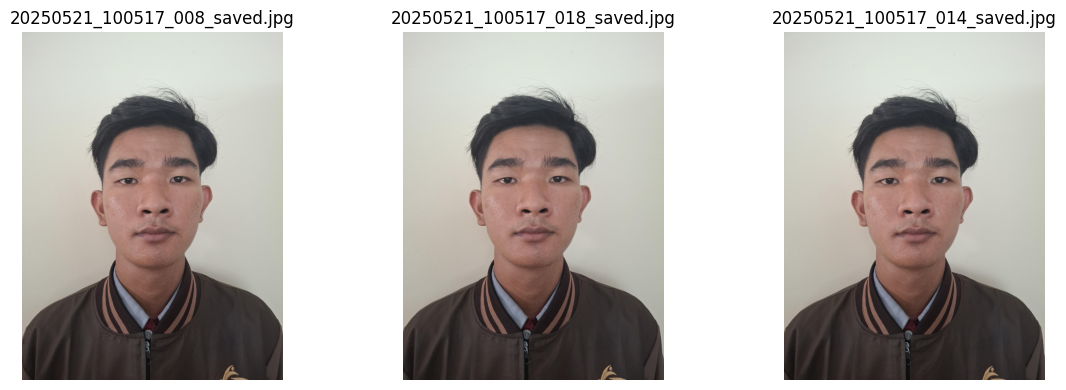


Aisyah Wulan Dari - total 4 images. Showing first 3:


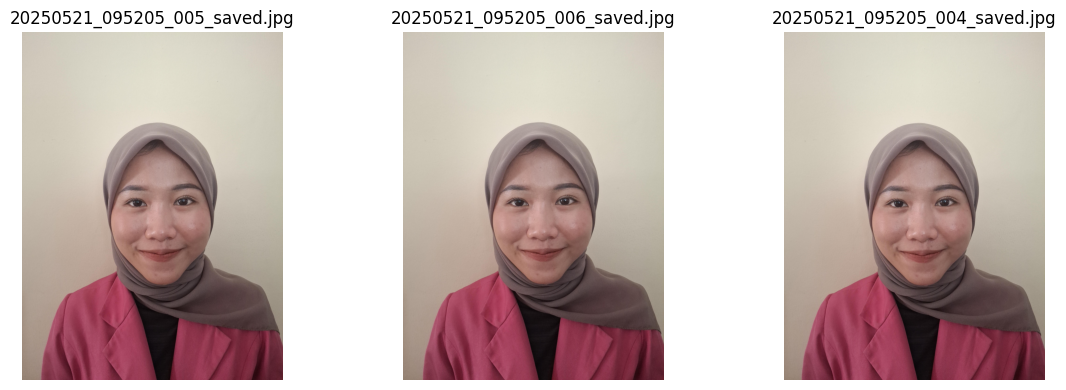

In [18]:
# cek kembali apakah rotation fotnya udh benar
folders = ["Arya Thomas", "Aisyah Wulan Dari"]  # sample folder untuk visualisasi
path = "/content/drive/MyDrive/dataset wajah_fixed"  # path dataset

for folder in folders:
    folder_path = os.path.join(path, folder)
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    # mampilkan 3 gambar pertama dari folder
    print(f"\n{folder} - total {len(image_files)} images. Showing first 3:")

    plt.figure(figsize=(12, 4))
    for i, img_name in enumerate(image_files[:3]):
        img_path = os.path.join(folder_path, img_name)
        img = Image.open(img_path)

        plt.subplot(1, 3, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(img_name)

    plt.tight_layout()
    plt.show()

In [19]:
# buat folder untuk split to train and test dir
root_dir = '/content/drive/MyDrive/Dataset-Wajah-Train-Test' # target dir

if os.path.exists(root_dir):
    shutil.rmtree(root_dir)

class_folders = [entry for entry in os.listdir(path)
                 if os.path.isdir(os.path.join(path, entry))]

def create_train_test_dirs(root_path, class_names):
    for subset in ['training', 'testing']:
        for class_name in class_names:
            os.makedirs(os.path.join(root_path, subset, class_name))

create_train_test_dirs(root_dir, class_folders)
print(f"Training & Testing folders created for {len(class_folders)} classes.")

Training & Testing folders created for 20 classes.


In [20]:
# test create_train_test_dirs function
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/content/drive/MyDrive/Dataset-Wajah-Train-Test/training
/content/drive/MyDrive/Dataset-Wajah-Train-Test/testing
/content/drive/MyDrive/Dataset-Wajah-Train-Test/training/Sina Widianti
/content/drive/MyDrive/Dataset-Wajah-Train-Test/training/Vikken Aghenta Pradana
/content/drive/MyDrive/Dataset-Wajah-Train-Test/training/Muhammad Rafi Athallah
/content/drive/MyDrive/Dataset-Wajah-Train-Test/training/Tona Lestari
/content/drive/MyDrive/Dataset-Wajah-Train-Test/training/Wulan Restu Utami
/content/drive/MyDrive/Dataset-Wajah-Train-Test/training/Rafika Ayu
/content/drive/MyDrive/Dataset-Wajah-Train-Test/training/Zahrany Mega Lestari
/content/drive/MyDrive/Dataset-Wajah-Train-Test/training/Sella
/content/drive/MyDrive/Dataset-Wajah-Train-Test/training/Risky Firdaus
/content/drive/MyDrive/Dataset-Wajah-Train-Test/training/Violin Annisa Ramadhani
/content/drive/MyDrive/Dataset-Wajah-Train-Test/training/Laras Anggi Wijayanti
/content/drive/MyDrive/Dataset-Wajah-Train-Test/training/Muhammad Kannu

In [22]:
# split_data
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  # shuffle list
  shuffled_source = random.sample(os.listdir(SOURCE), len(os.listdir(SOURCE)))

  training_number = int(len(shuffled_source) * SPLIT_SIZE)

  i = 0
  target = TRAINING

  for item in shuffled_source:
    item_source = os.path.join(SOURCE, item)
    if os.path.getsize(item_source) == 0:
      print(f'{item} is zero length, so ignoring.')
    else:
      copyfile(item_source, os.path.join(target, item))
      i += 1

    if i == training_number:
      target = TESTING

In [23]:
# bagi dataset ke train dan test
SOURCE_DATASET = '/content/drive/MyDrive/dataset wajah_fixed' # sesuaikan dengan path yg sesuai
TARGET_ROOT = '/content/drive/MyDrive/Dataset-Wajah-Train-Test'
SPLIT_SIZE = 0.8 # 80% train

class_folders = [entry for entry in os.listdir(SOURCE_DATASET)
                 if os.path.isdir(os.path.join(SOURCE_DATASET, entry))]

if os.path.exists(TARGET_ROOT):
    shutil.rmtree(TARGET_ROOT)

for subset in ['training', 'testing']:
    for class_name in class_folders:
        os.makedirs(os.path.join(TARGET_ROOT, subset, class_name))

def split_data(source_dir, training_dir, testing_dir, split_size):
    files = [f for f in os.listdir(source_dir) if os.path.getsize(os.path.join(source_dir, f)) > 0]
    random.shuffle(files)

    split_idx = int(len(files) * split_size)
    train_files = files[:split_idx]
    test_files = files[split_idx:]

    for folder in [training_dir, testing_dir]:
        for file in os.scandir(folder):
            os.remove(file.path)

    for file in train_files:
        copyfile(os.path.join(source_dir, file), os.path.join(training_dir, file))
    for file in test_files:
        copyfile(os.path.join(source_dir, file), os.path.join(testing_dir, file))

for class_name in class_folders:
    source_dir = os.path.join(SOURCE_DATASET, class_name)
    train_dir = os.path.join(TARGET_ROOT, 'training', class_name)
    test_dir = os.path.join(TARGET_ROOT, 'testing', class_name)
    split_data(source_dir, train_dir, test_dir, SPLIT_SIZE)

print("Split Berhasil")
for class_name in class_folders:
    train_count = len(os.listdir(os.path.join(TARGET_ROOT, 'training', class_name)))
    test_count = len(os.listdir(os.path.join(TARGET_ROOT, 'testing', class_name)))
    print(f"{class_name}: {train_count} train / {test_count} test")

Split Berhasil
Sina Widianti: 19 train / 5 test
Vikken Aghenta Pradana: 5 train / 2 test
Muhammad Rafi Athallah: 8 train / 3 test
Tona Lestari: 20 train / 6 test
Wulan Restu Utami: 36 train / 9 test
Rafika Ayu: 20 train / 6 test
Zahrany Mega Lestari: 28 train / 8 test
Sella: 29 train / 8 test
Risky Firdaus: 47 train / 12 test
Violin Annisa Ramadhani: 25 train / 7 test
Laras Anggi Wijayanti: 13 train / 4 test
Muhammad Kannu Santara: 32 train / 8 test
Emilia Fransiska: 32 train / 8 test
Azzahra Karindiva: 13 train / 4 test
Dody Ardiansyah: 28 train / 7 test
Ilham Saleh: 3 train / 1 test
Dila Puspitasari: 44 train / 12 test
Marsellina: 3 train / 1 test
Aisyah Wulan Dari: 3 train / 1 test
Arya Thomas: 8 train / 3 test


In [24]:
# train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
    )

    train_generator = train_datagen.flow_from_directory(
        directory=TRAINING_DIR,
        batch_size=32,
        class_mode='categorical',
        target_size=(150, 150),
        shuffle=True
    )

    validation_datagen = ImageDataGenerator(rescale=1./255.)

    validation_generator = validation_datagen.flow_from_directory(
        directory=VALIDATION_DIR,
        batch_size=16,
        class_mode='categorical',
        target_size=(150, 150),
        shuffle=False
    )

    return train_generator, validation_generator

In [26]:
# test generators
TRAIN_DIR = '/content/drive/MyDrive/Dataset-Wajah-Train-Test/training'
TEST_DIR = '/content/drive/MyDrive/Dataset-Wajah-Train-Test/testing'

train_generator, val_generator = train_val_generators(TRAIN_DIR, TEST_DIR)

# cek total iamge pada training
total_train_images = sum([len(files) for _, _, files in os.walk(TRAIN_DIR)])
print(f"Total Training Images: {total_train_images}")

# total image pada val
total_val_images = sum([len(files) for _, _, files in os.walk(TEST_DIR)])
print(f"Total Validation Images: {total_val_images}")

Found 416 images belonging to 20 classes.
Found 115 images belonging to 20 classes.
Total Training Images: 416
Total Validation Images: 115


In [27]:
# create_model
num_classes = 20

def create_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(num_classes, activation='softmax')
  ])

  model.compile(optimizer=Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  return model

In [30]:
# panggil fungsi model
model = create_model()

# fitting
history = model.fit(train_generator,
                    epochs=10,
                    verbose=1,
                    validation_data=val_generator)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 54s 4s/step - accuracy: 0.0952 - loss: 3.2974 - val_accuracy: 0.1043 - val_loss: 2.7604
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.1321 - loss: 2.7058 - val_accuracy: 0.3217 - val_loss: 2.3225
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step - accuracy: 0.3344 - loss: 2.2116 - val_accuracy: 0.6522 - val_loss: 1.5939
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - accuracy: 0.5882 - loss: 1.5548 - val_accuracy: 0.6696 - val_loss: 1.0243
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.7538 - loss: 0.9366 - val_accuracy: 0.7739 - val_loss: 0.5946
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.7743 - loss: 0.7365 - val_accuracy: 0.8435 - val_loss: 0.6607
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.8279 - loss: 0.5869 - val_accuracy: 0.7391 - val_loss: 0.8493
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step - accuracy: 0.8688 - loss: 0.4810 - val_accuracy: 0.7304 - val_loss:

In [31]:
# summary model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     9,470,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 20)             │        10,260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,512,926 (108.77 MB)

 Trainable params: 9,504,308 (36.26 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,008,618 (72.51 MB)

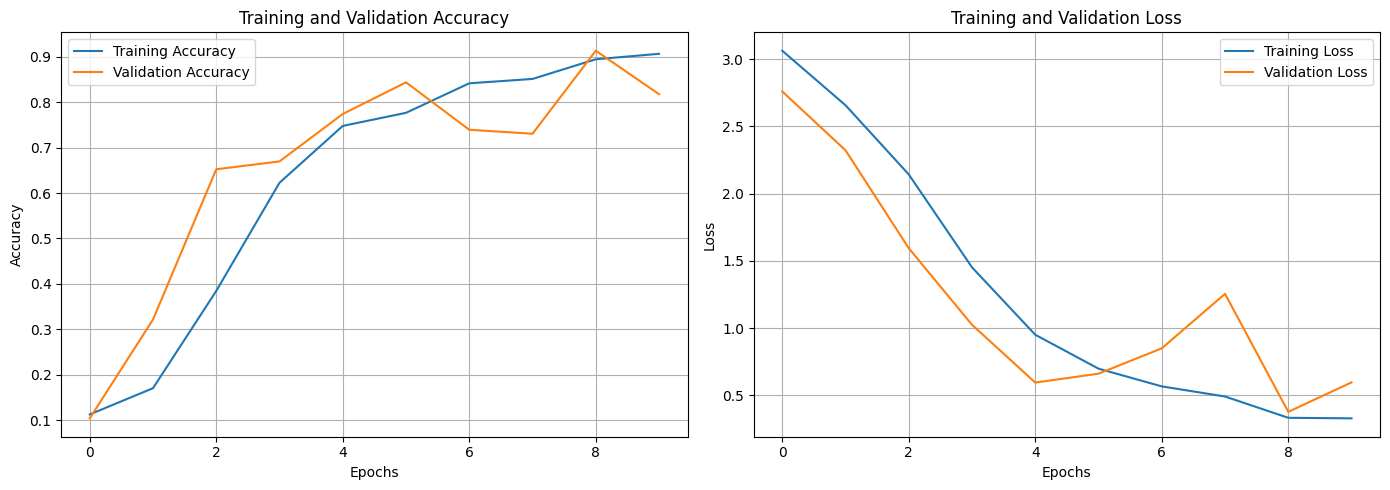

In [32]:
# ambil acc and loss dari hasil training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(14, 5))

# acc
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [33]:
# print the final accuracy and loss
print("Final training accuracy:", acc[-1])
print("Final validation accuracy:", val_acc[-1])
print("Final training loss:", loss[-1])
print("Final validation loss:", val_loss[-1])

Final training accuracy: 0.90625
Final validation accuracy: 0.8173912763595581
Final training loss: 0.32845398783683777
Final validation loss: 0.595917284488678


In [34]:
# model eval
true_labels = val_generator.classes

pred_probs = model.predict(val_generator, verbose=1)
pred_labels = np.argmax(pred_probs, axis=1)

class_names = list(val_generator.class_indices.keys())

8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step


In [35]:
# classification report
print("Classification Report:\n")
print(classification_report(true_labels, pred_labels, target_names=class_names))

Classification Report:

                         precision    recall  f1-score   support

      Aisyah Wulan Dari       1.00      1.00      1.00         1
            Arya Thomas       1.00      1.00      1.00         3
      Azzahra Karindiva       1.00      1.00      1.00         4
       Dila Puspitasari       1.00      1.00      1.00        12
        Dody Ardiansyah       0.58      1.00      0.74         7
       Emilia Fransiska       1.00      0.75      0.86         8
            Ilham Saleh       1.00      1.00      1.00         1
  Laras Anggi Wijayanti       0.00      0.00      0.00         4
             Marsellina       0.00      0.00      0.00         1
 Muhammad Kannu Santara       1.00      1.00      1.00         8
 Muhammad Rafi Athallah       0.00      0.00      0.00         3
             Rafika Ayu       1.00      1.00      1.00         6
          Risky Firdaus       1.00      1.00      1.00        12
                  Sella       0.89      1.00      0.94         8


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


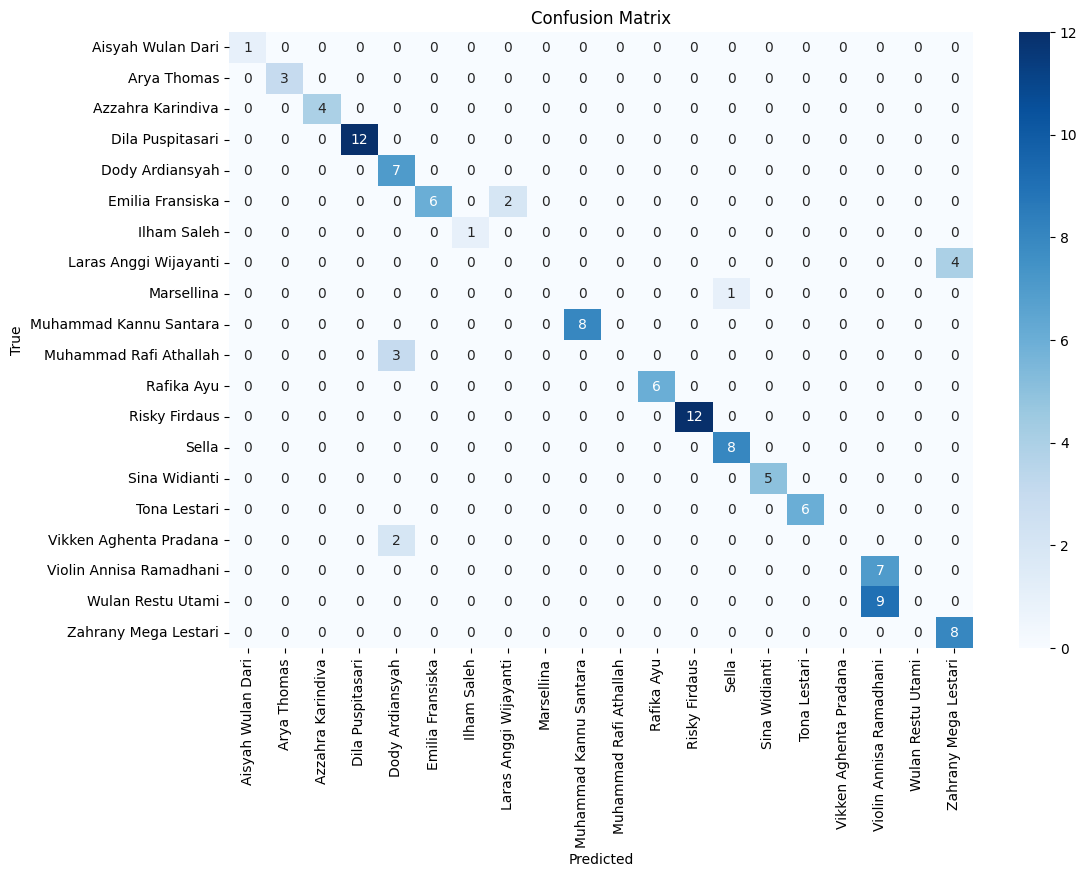

In [36]:
# confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [37]:
# save model
model.save('face_classifier_model.h5')